<a href="https://colab.research.google.com/github/Harihs14/Brand-Detection-and-Analysis/blob/main/Brand_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Mar 17 22:46:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
!mv best.pt ./weights

mv: cannot stat 'best.pt': No such file or directory


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l14594fGtOQLSrSnre2s")
project = rf.workspace("firedetection-gqq5q").project("brand_detection-izeol")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to brand_detection-2 in yolov8:: 100%|██████████| 2648/2648 [00:00<00:00, 4615.68it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = project.version(1).download("yolov8")


Extracting Dataset Version Zip to brand_detection-1 in yolov8:: 100%|██████████| 1260/1260 [00:00<00:00, 5628.31it/s]


In [ ]:
model = project.version(1).model

In [ ]:
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()

running inference on IMG_20240316_103924_jpg.rf.2b6abbc325eebb8521cc329275a513dd.jpg


HTTPError: 403 Client Error: Forbidden for url: https://detect.roboflow.com/brand_detection-izeol/1?api_key=l14594fGtOQLSrSnre2s&name=YOUR_IMAGE.jpg&overlap=30&confidence=40&stroke=1&labels=false&format=json

In [ ]:
import cv2 as cv

img = cv.imread('/Capture.JPG')

pred = model.predict(img,confidence=40, overlap=30).json()

NameError: name 'model' is not defined

In [ ]:
pred['predictions']

NameError: name 'pred' is not defined

In [ ]:
pred['predictions'][0]['class']

NameError: name 'pred' is not defined

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=75 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 218MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/brand_detection-1/data.yaml, epochs=75, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch2277.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1710715742.5d2ade7e06b8.1686.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2275.jpg  weights
P_curve.png					    train_batch2276.jpg


/content


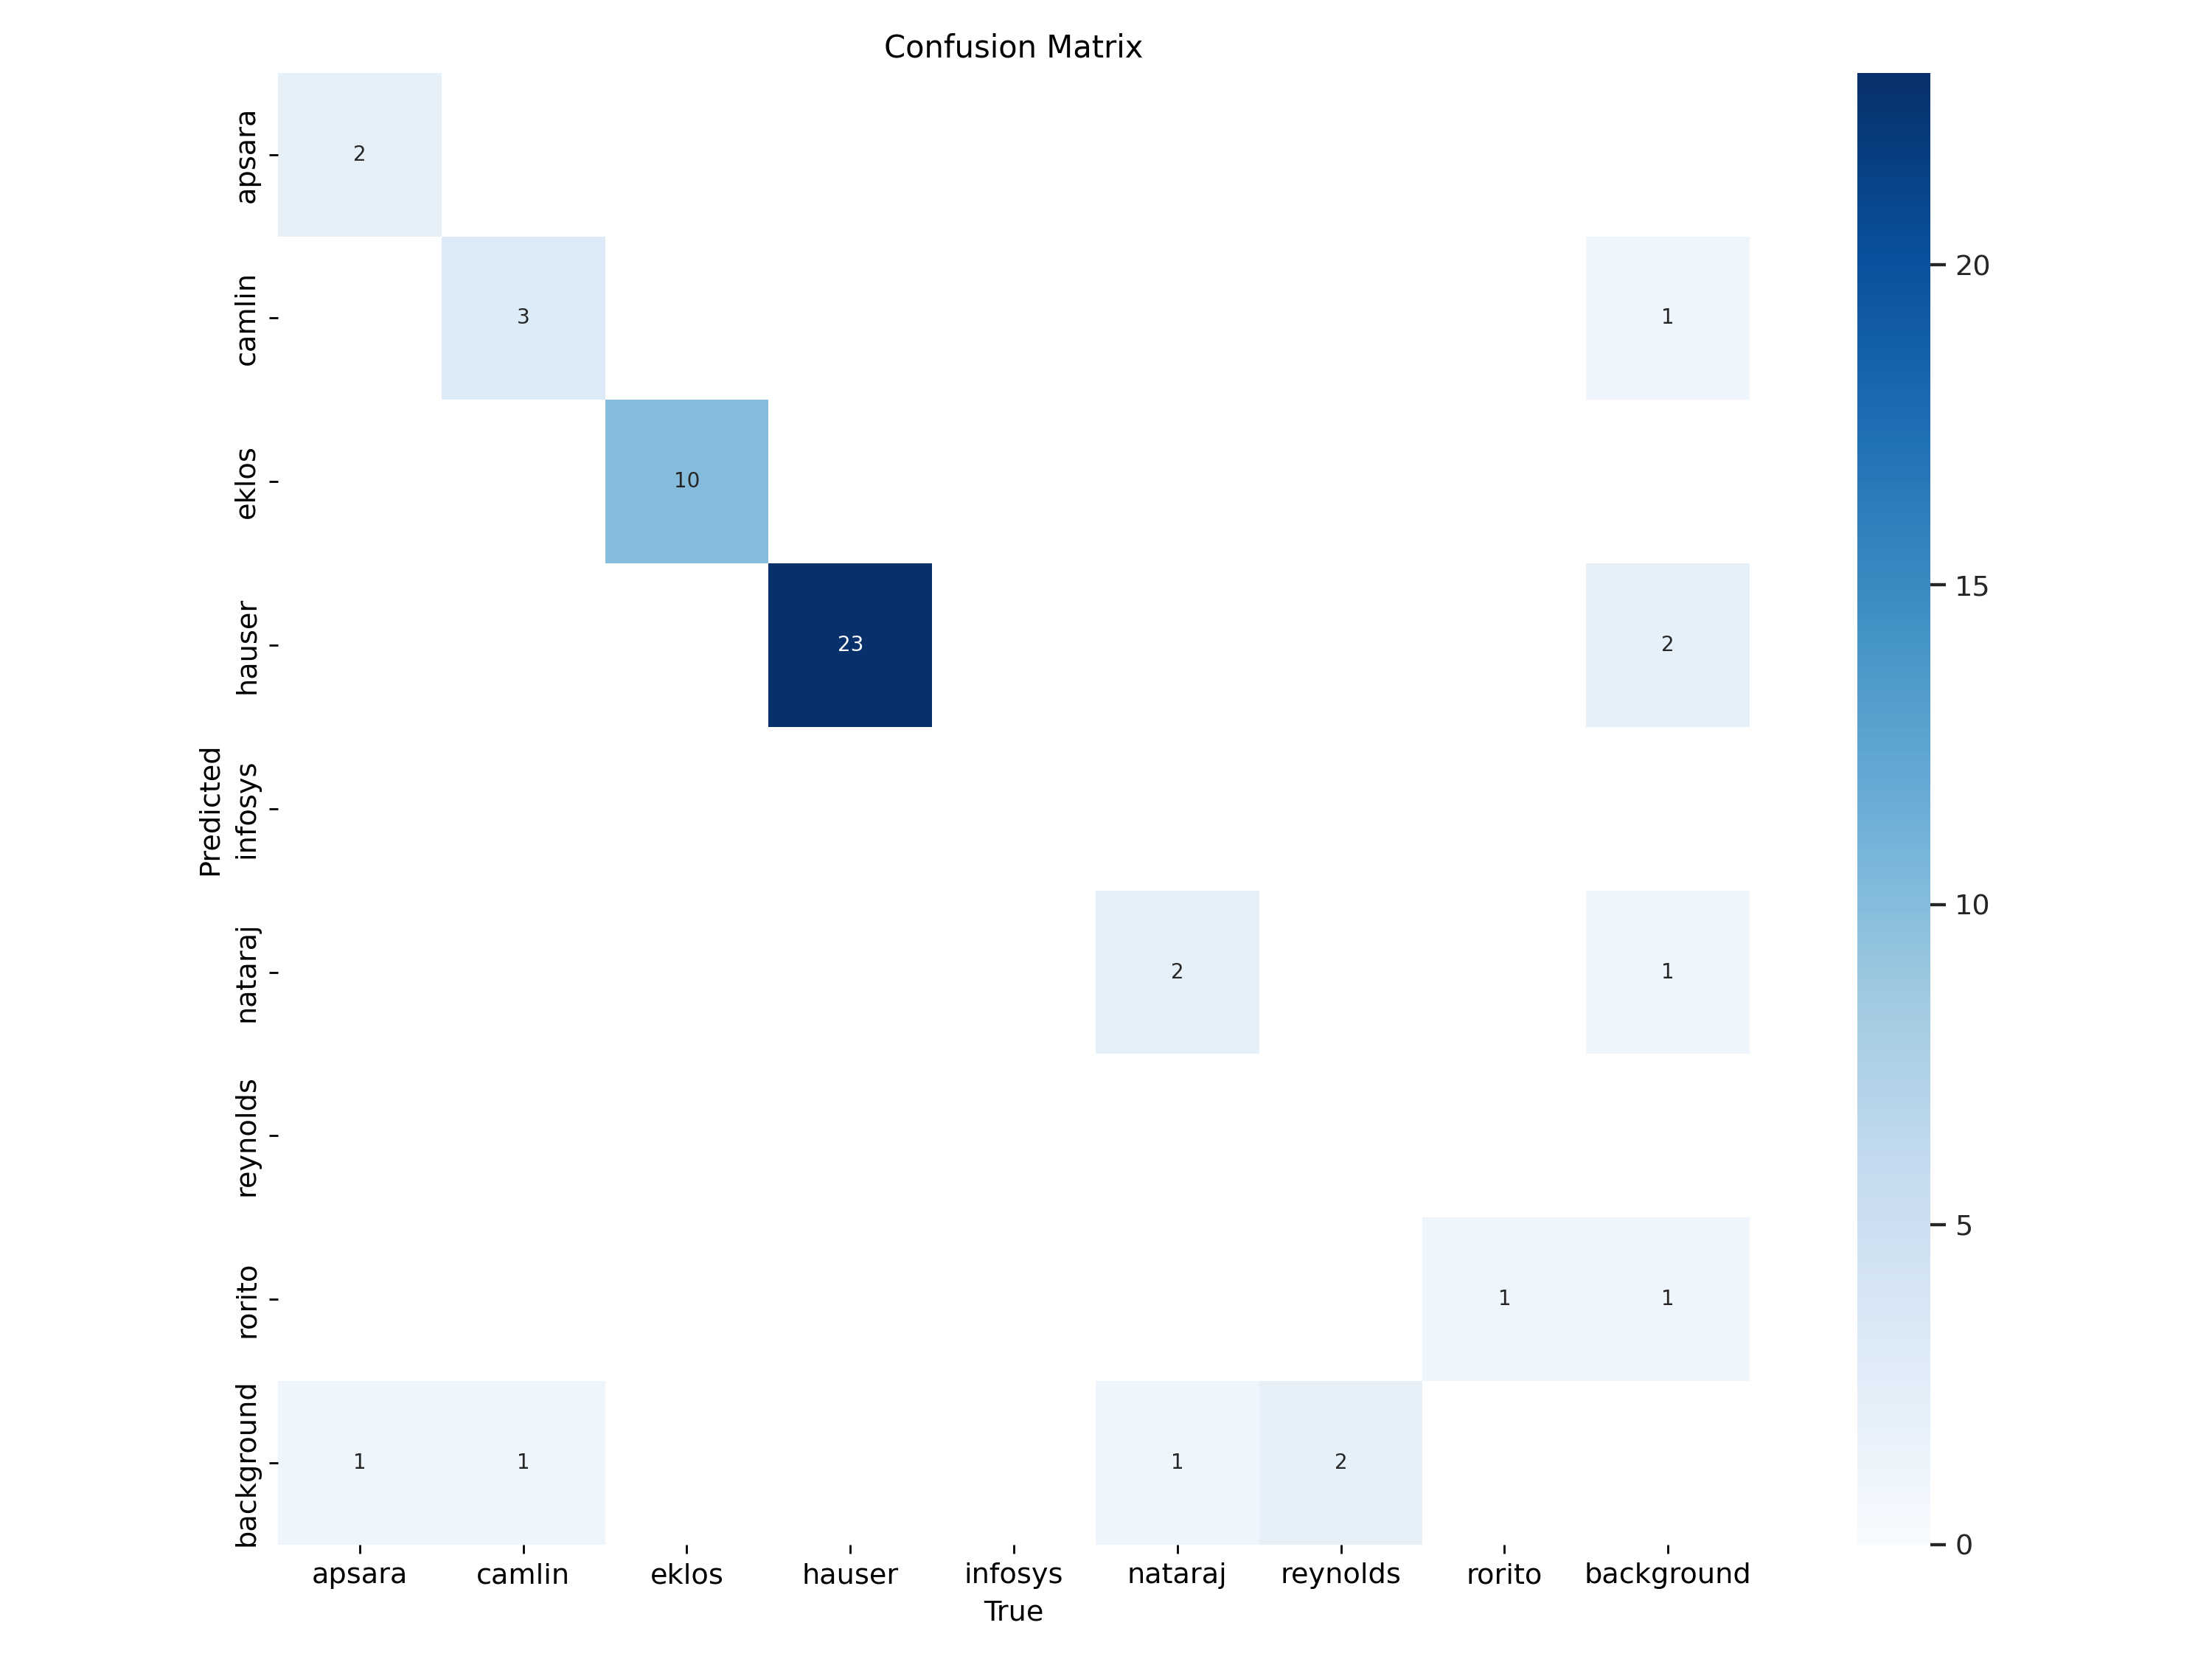

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


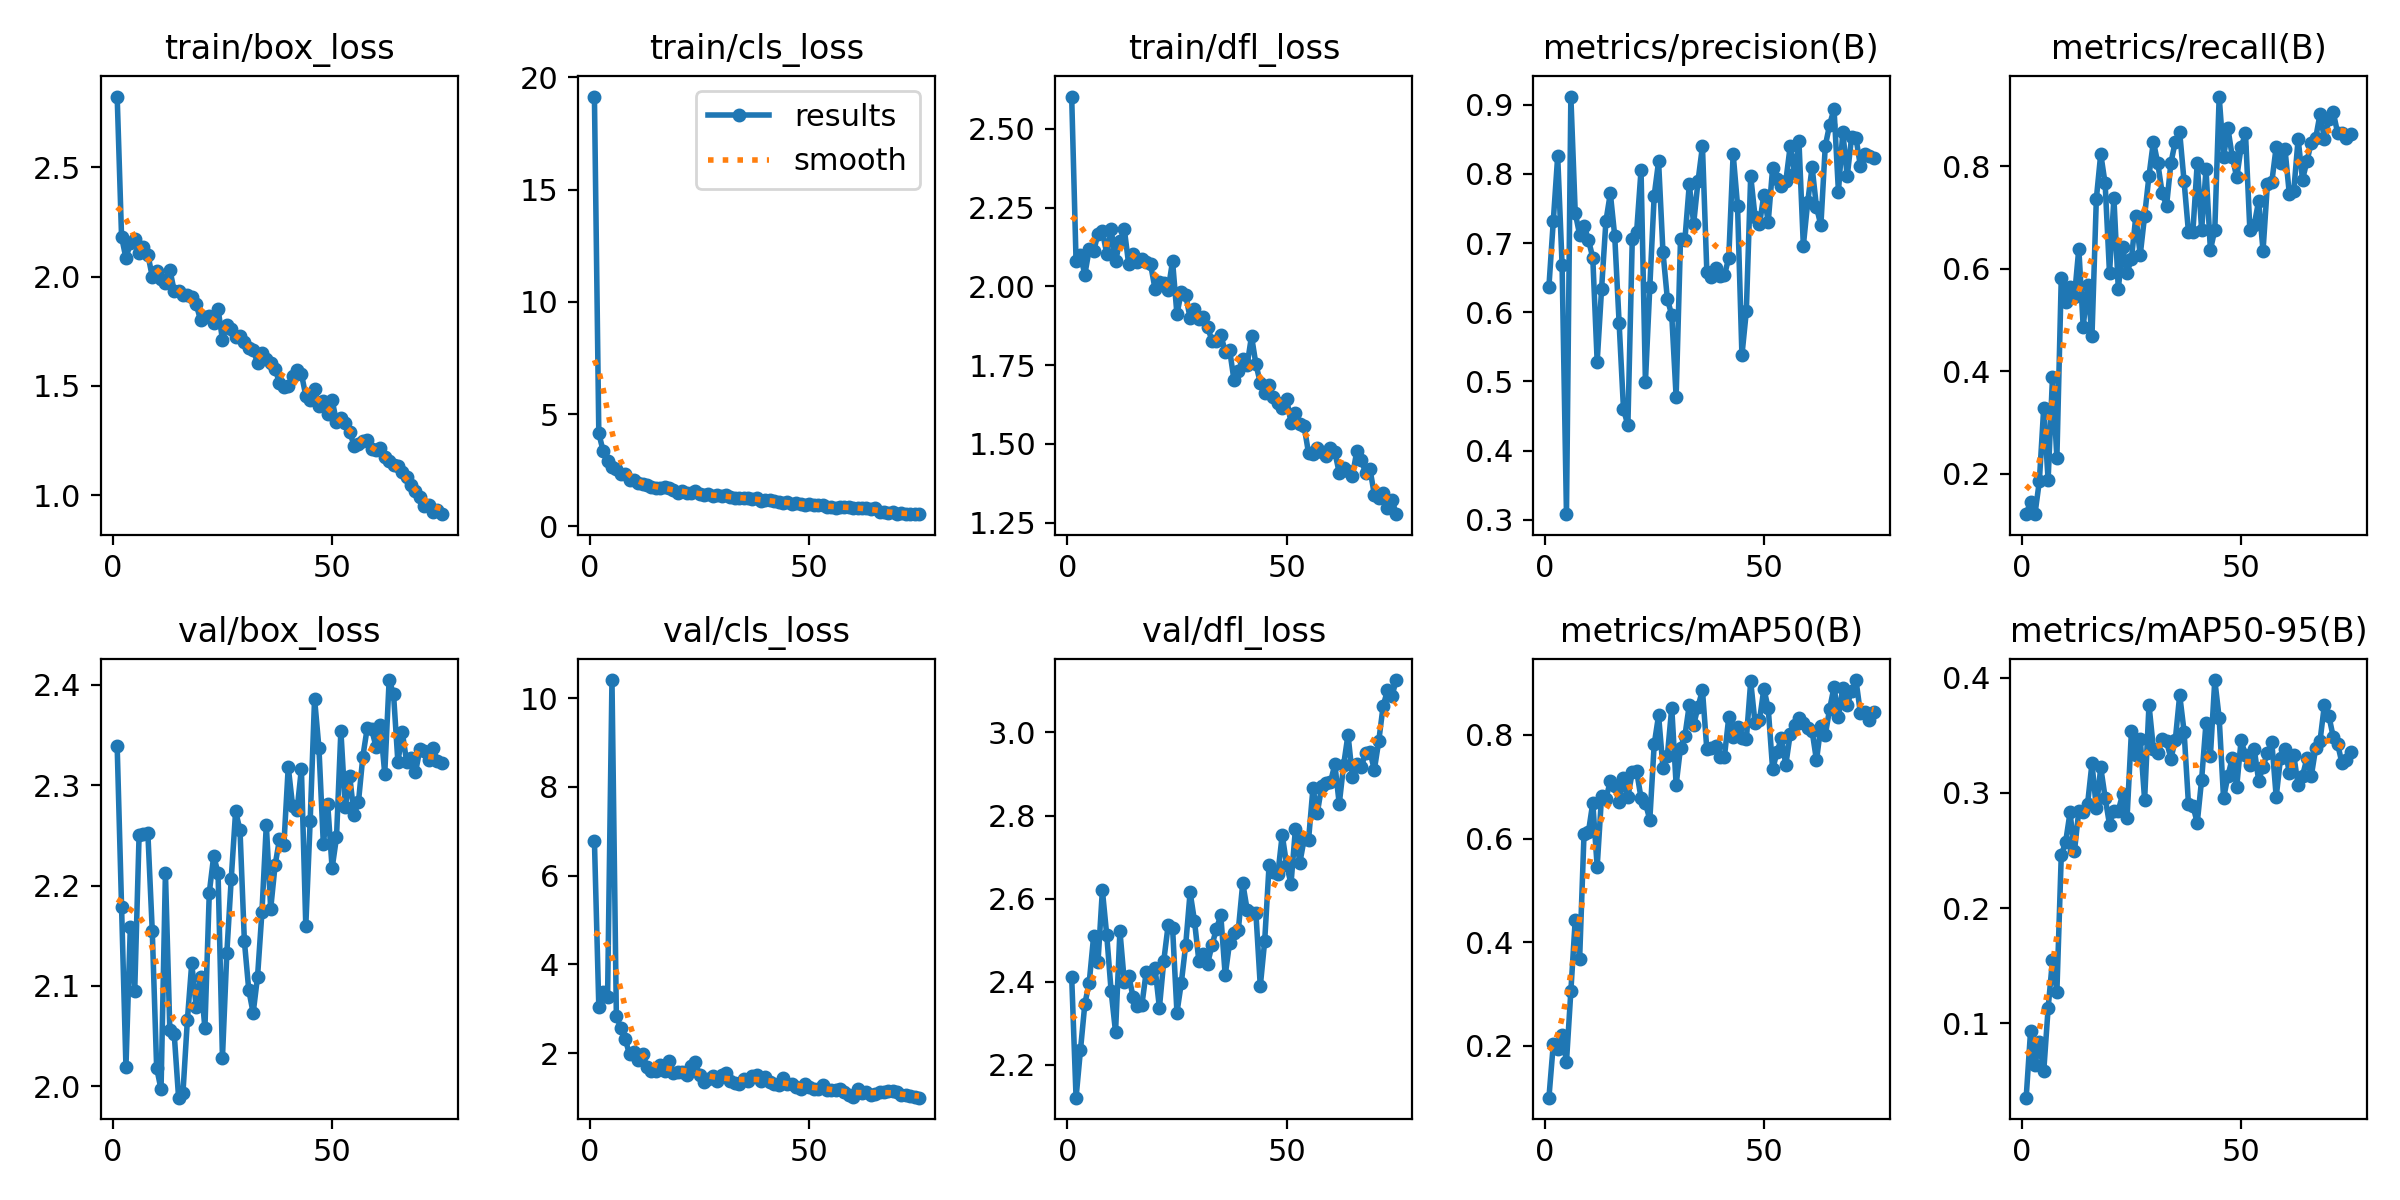

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


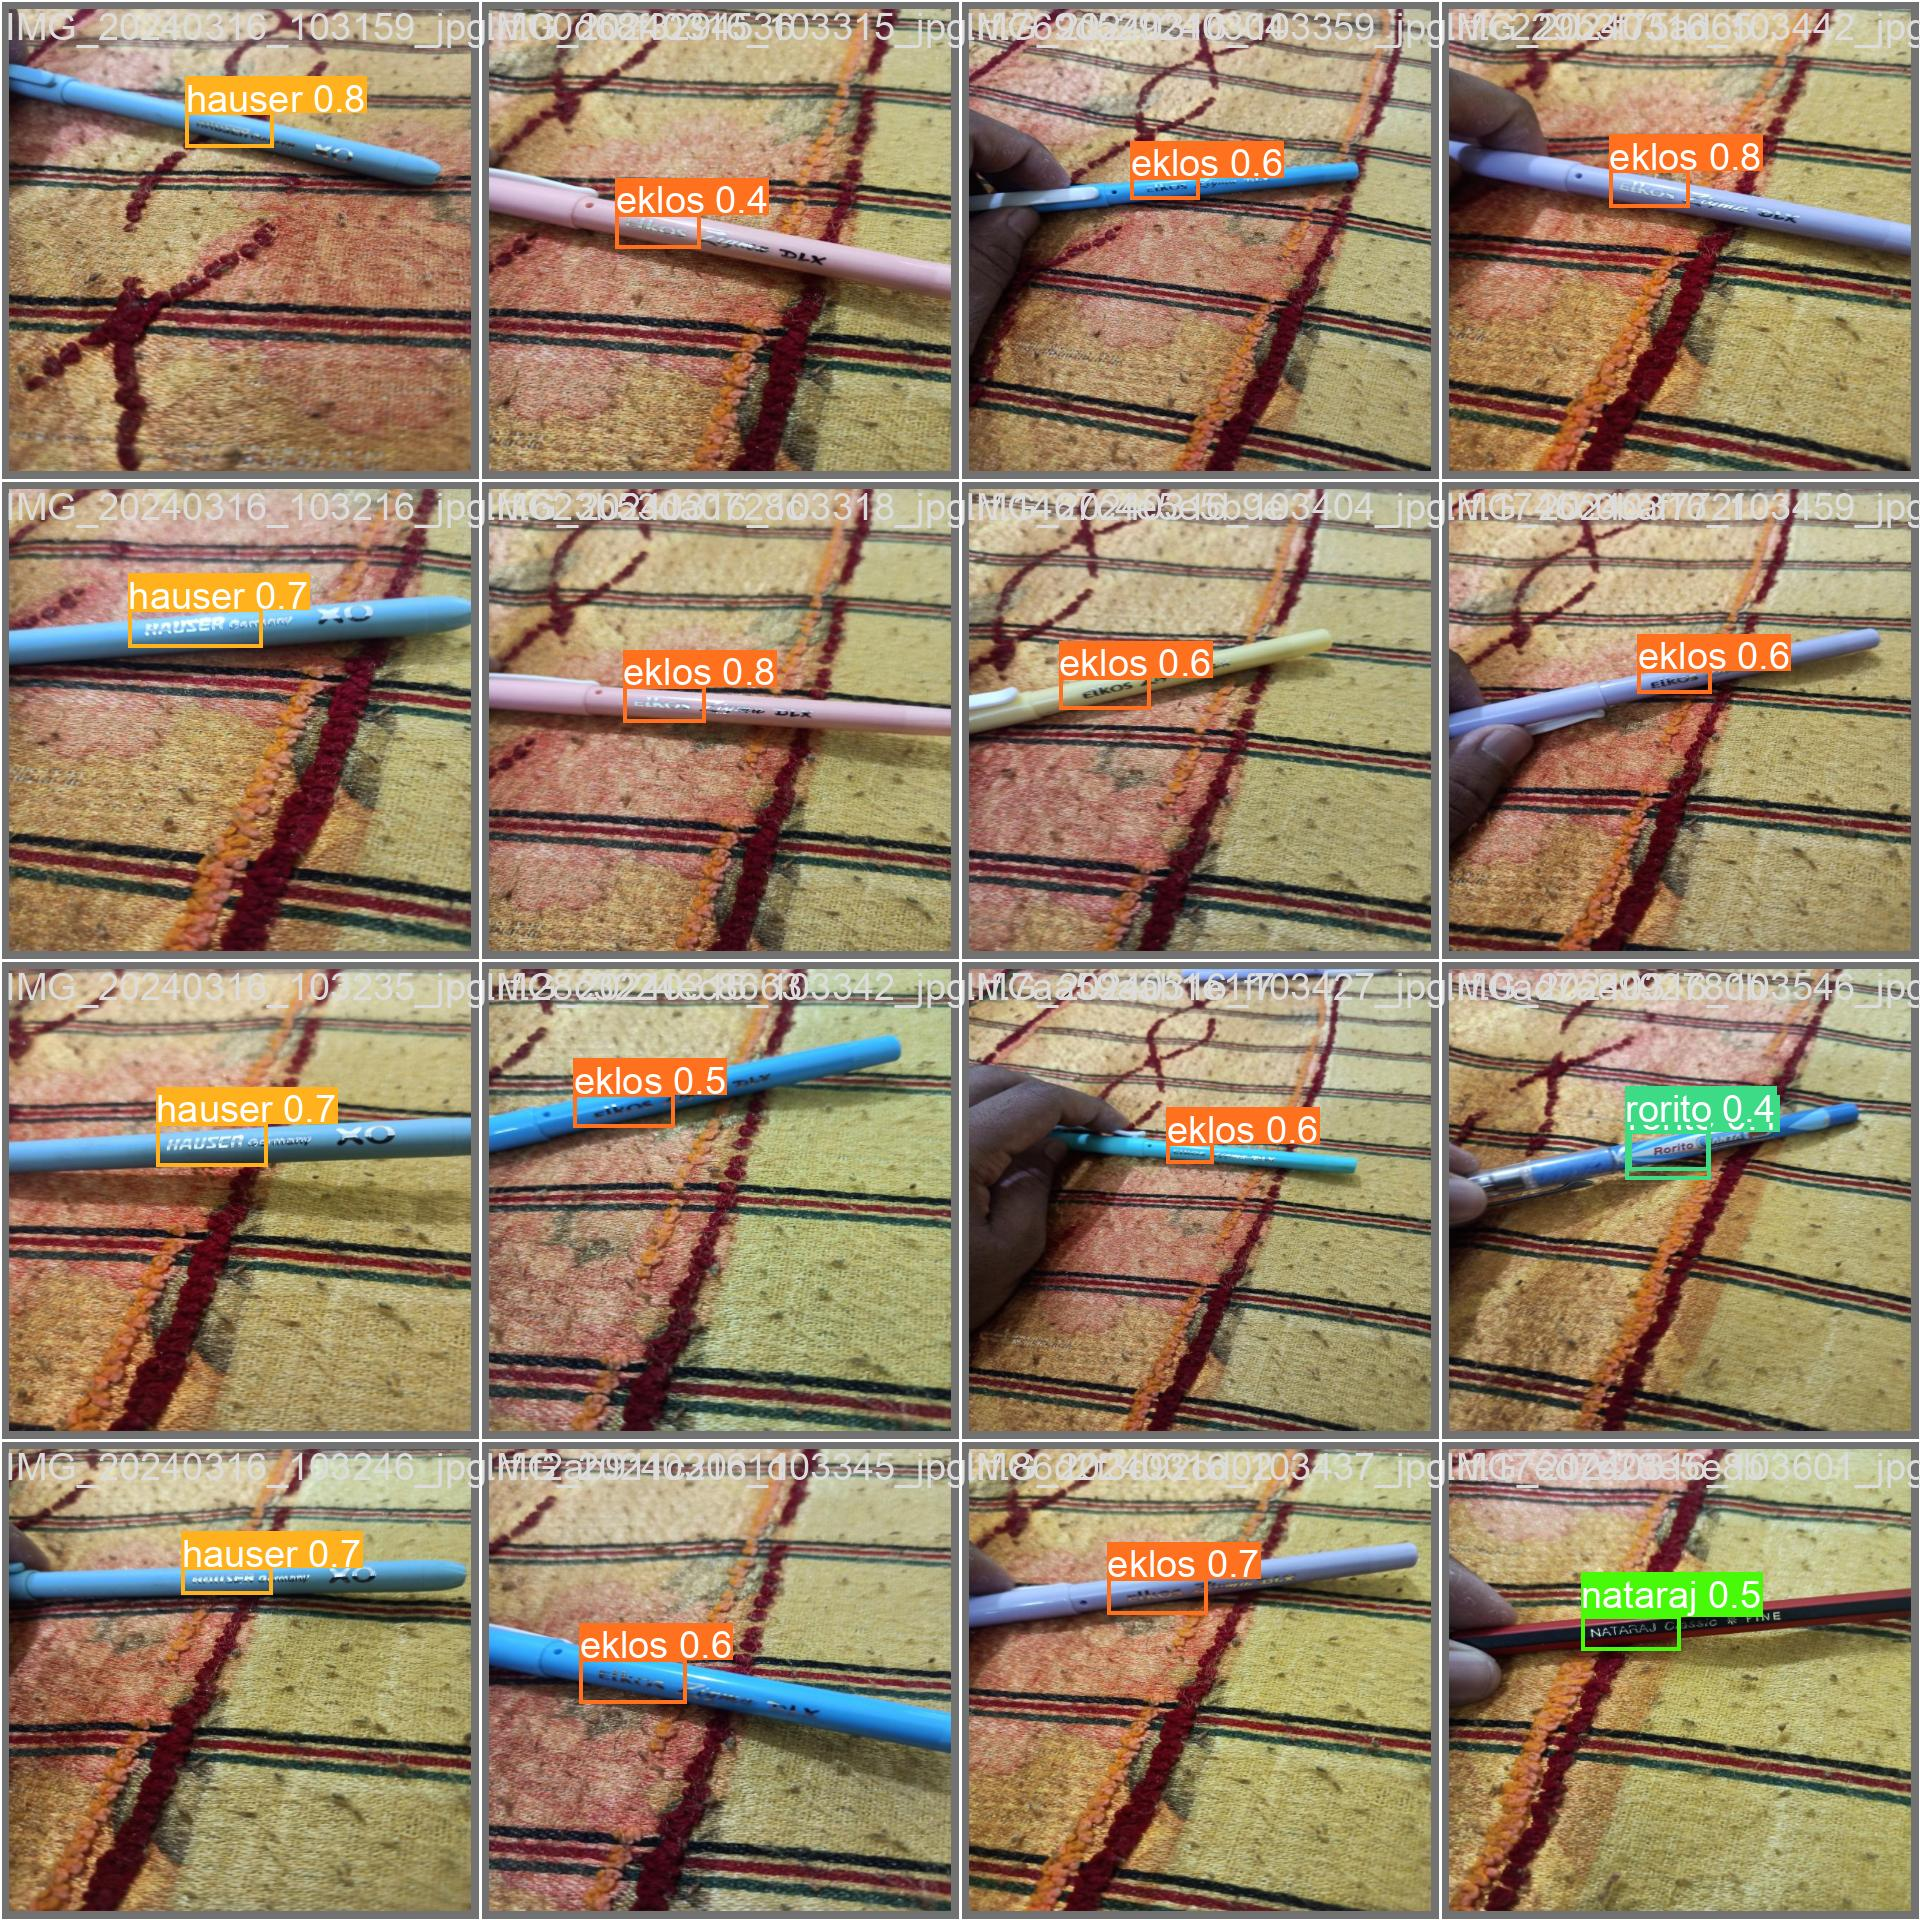

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/brand_detection-1/valid/labels.cache... 52 images, 6 backgrounds, 0 corrupt: 100% 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.00s/it]
                   all         52         46      0.754      0.676      0.816      0.398
                apsara         52          3      0.893      0.667      0.913        0.5
                camlin         52          4      0.709      0.627      0.642      0.274
                 eklos         52         10      0.874        0.9      0.875      0.307
                hauser         52         23      0.823       0.87      0.869      0.342
               nataraj         52          3      0.468      0.667       0.72      0.314
              reynolds         52   

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/26 /content/brand_detection-1/test/images/IMG_20240316_102833_jpg.rf.1baaa0475348d03bdb0fa67ace381bcc.jpg: 800x800 1 hauser, 22.5ms
image 2/26 /content/brand_detection-1/test/images/IMG_20240316_102842_jpg.rf.683d7a0a26c4dc3551962135b7519dc5.jpg: 800x800 1 hauser, 22.6ms
image 3/26 /content/brand_detection-1/test/images/IMG_20240316_102946_jpg.rf.47eed7d0b1e2af22749134f4eea51381.jpg: 800x800 1 hauser, 22.4ms
image 4/26 /content/brand_detection-1/test/images/IMG_20240316_103006_jpg.rf.17f651d4adc8f1beca3818f611f5320c.jpg: 800x800 1 hauser, 22.4ms
image 5/26 /content/brand_detection-1/test/images/IMG_20240316_103031_jpg.rf.a8d61119e336b8eec5c544c535095762.jpg: 800x800 2 hausers, 22.5ms
image 6/26 /content/brand_detection-1/test/images/IMG_20240316_103050_jpg.rf.2c51df67d88a0bdaaf029e5d960471f2.jpg: 800x8

**NOTE:** Let's take a look at few results.

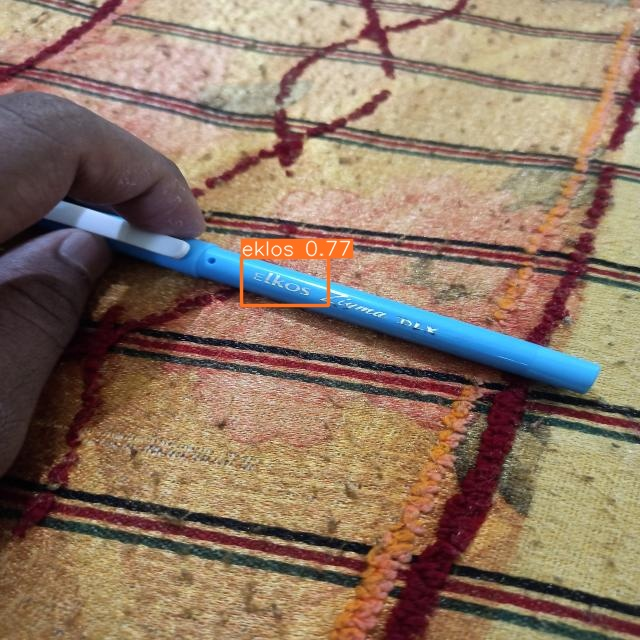

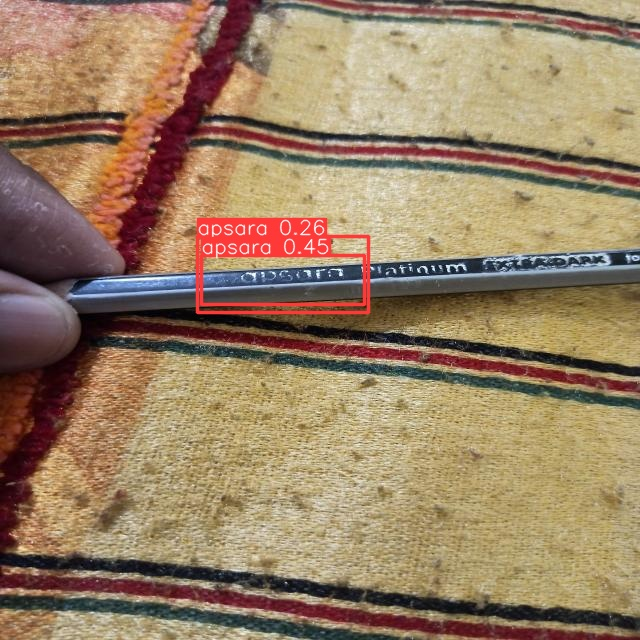

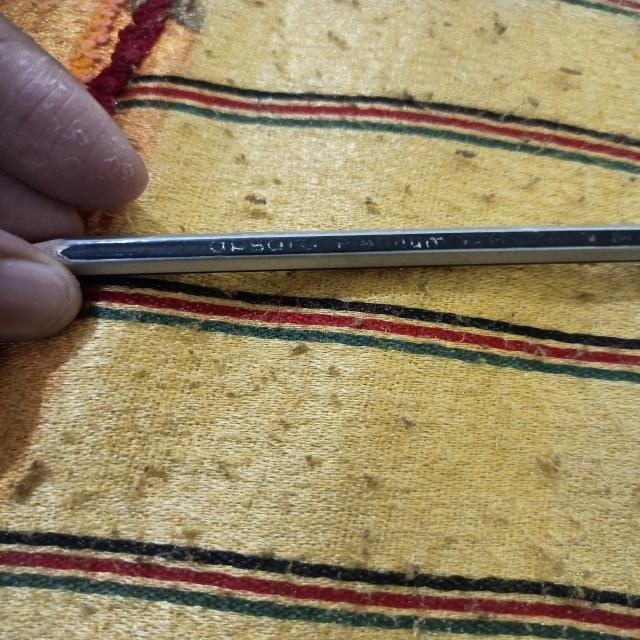

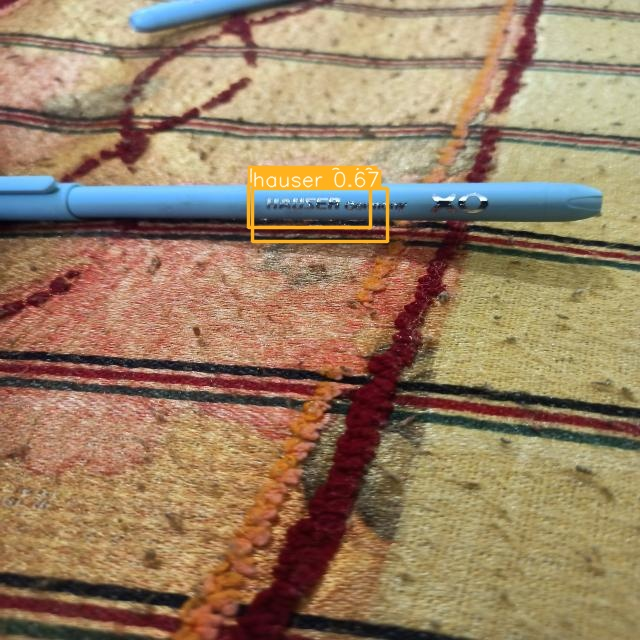

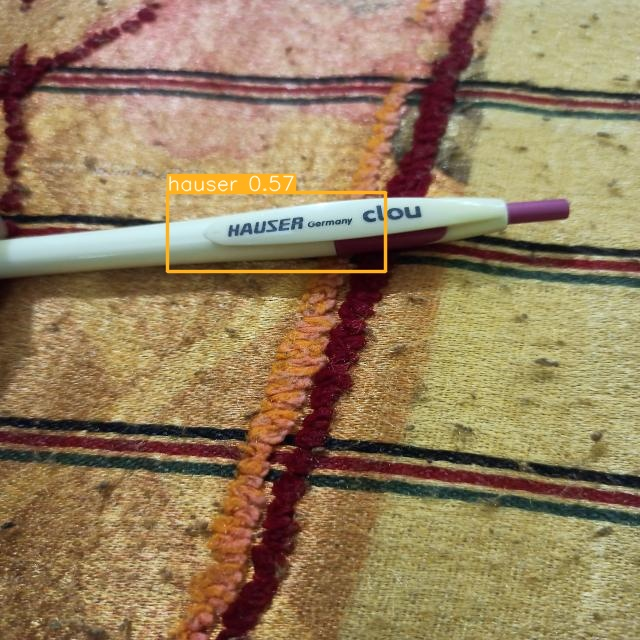

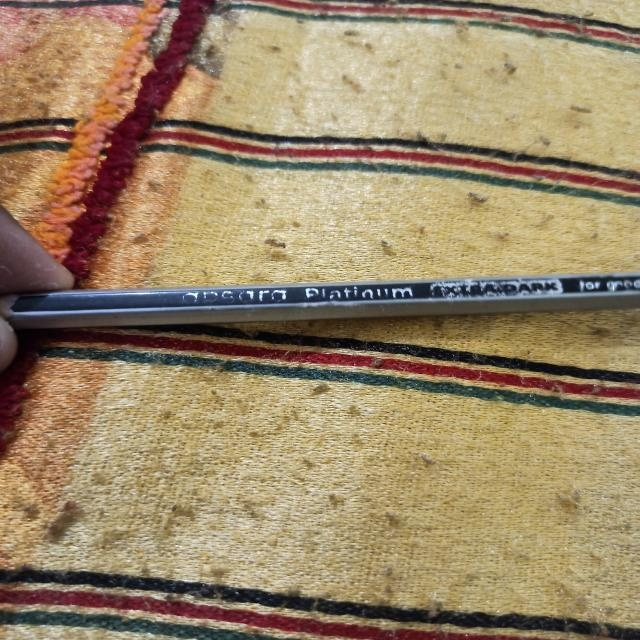

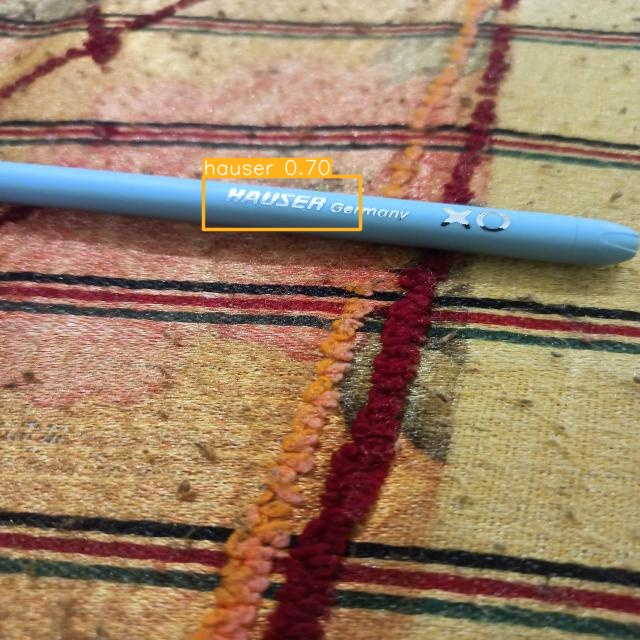

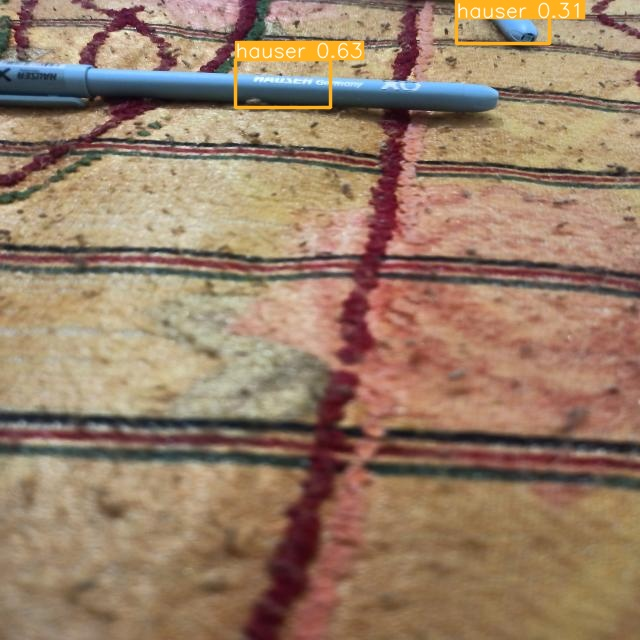

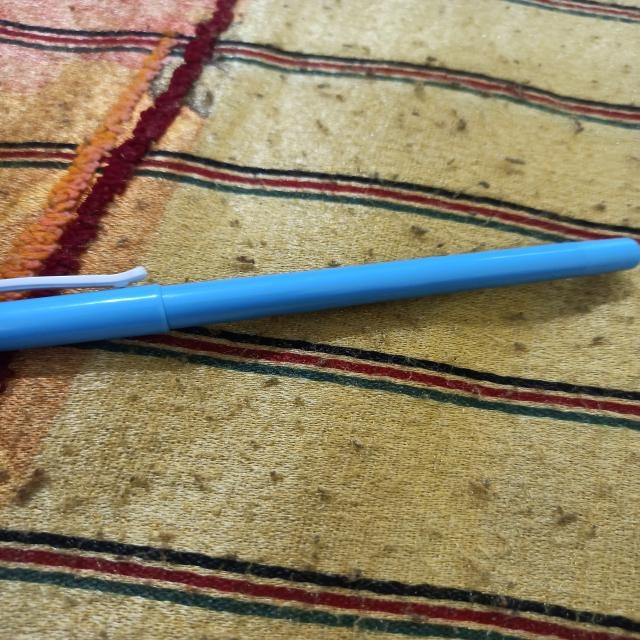

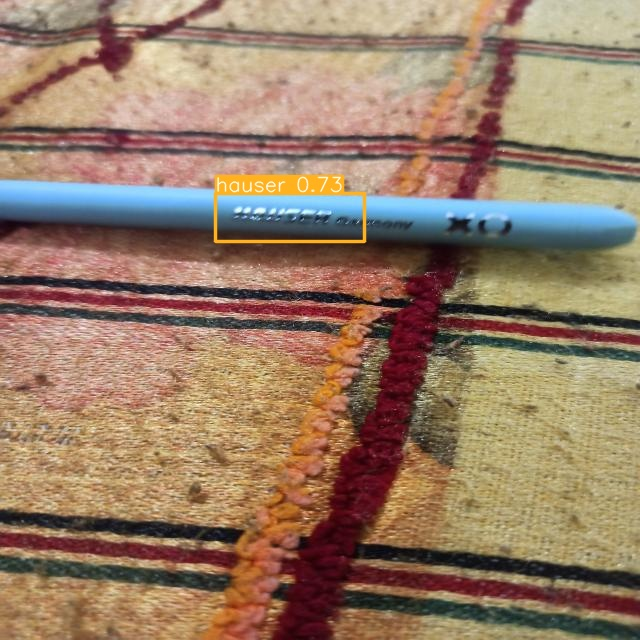

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:20:2]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 127MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 125.3ms
Speed: 3.4ms preprocess, 125.3ms inference, 762.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/dog.jpeg'

In [ ]:
import requests

workspace_id = "firedetection-gqq5q"
model_id = "fire-l9v3c"
image_url = "https://img.freepik.com/free-photo/bonfire-flame-element-realistic-burning-fire-image_53876-142941.jpg?size=626&ext=jpg&ga=GA1.1.632798143.1705968000&semt=sph"
confidence = 0.75
api_key = "l14594fGtOQLSrSnre2s"
iou_thresh = 0.4

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_payload,
)

predictions = res.json()

ConnectionError: HTTPConnectionPool(host='localhost', port=9001): Max retries exceeded with url: /firedetection-gqq5q/fire-l9v3c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7c806899c3a0>: Failed to establish a new connection: [Errno 111] Connection refused'))